In [120]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpctools.extensions import *
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, adjusted_mutual_info_score, accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Part(a)

#### Data Imports

In [2]:
data_path_train = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_train.csv')
ng_train = pd.read_csv(data_path_train, delimiter = ',', header = 0, compression = 'bz2')

In [3]:
data_path_test = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')
ng_test = pd.read_csv(data_path_test, delimiter = ',', header = 0, compression = 'bz2')

## 1.Exploratory Data Analysis 

##### Training Set

Nrows: 5648
NCols: 1001
[0 1 2 3 4 5 6 7]
Number of classes: 8


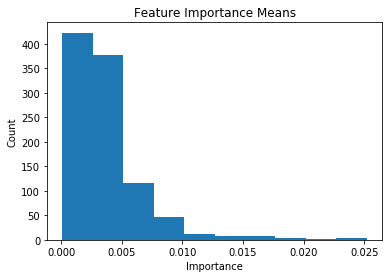

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,...,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
mean,0.001708,0.001472,0.006335,0.002273,0.002466,0.004041,0.002923,0.001420,0.002057,0.001560,...,0.003717,0.004887,0.003494,0.002800,0.006421,0.001851,0.006020,0.008144,0.006705,3.345255
std,0.034360,0.016554,0.033866,0.026688,0.022362,0.030053,0.024208,0.018515,0.020301,0.020248,...,0.028373,0.033153,0.027797,0.025441,0.037083,0.020132,0.036011,0.037727,0.039841,2.208888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.956585,0.443807,0.565277,0.711480,0.529982,0.635985,0.560049,0.461537,0.657318,0.631932,...,0.614346,0.698880,0.511068,0.596214,0.751603,0.561412,0.617048,0.438414,0.736056,7.000000


In [4]:
print('Nrows: {}'.format(ng_train.shape[0]))
print('NCols: {}'.format(ng_train.shape[1]))
list_un = ng_train['class'].unique()
sort_un = np.sort(list_un)
print(sort_un)
print('Number of classes: {}'.format(len(ng_train['class'].unique())))

X_temp = ng_train.drop('class', axis = 1)

description = X_temp.describe()
means_importance = (description[:'mean'].drop('count')).values

plt.hist(means_importance[0])
plt.title('Feature Importance Means')
plt.xlabel('Importance')
plt.ylabel('Count')
plt.show()

ng_train.describe()

 - We have 5648 data points/ articles with 1001 attributes
 - All attributes seem to have between a 0 minimum and 1 maximium, this suggest the data has already been standardised using max/min function
 - The standard deviations and means of the attributes are all low(<<1) however not equal across the board and so there has been no mu/sigma standardisation
 - There are 8 unique classes for the data

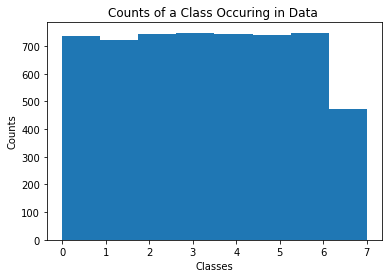

Number of 0 class occurences: 737
Number of 1 class occurences: 722
Number of 2 class occurences: 742
Number of 3 class occurences: 747
Number of 4 class occurences: 743
Number of 5 class occurences: 738
Number of 6 class occurences: 748
Number of 7 class occurences: 471


In [5]:
plt.hist(ng_train['class'], bins = 8)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Counts of a Class Occuring in Data ')
plt.show()

for i in sort_un:
    total_of_class = ng_train[ng_train['class']==i].shape[0]
    print('Number of {:.0f} class occurences: {}'.format(i, total_of_class))

 - There are a fairly equal number of class occurences over the first 7 in the trianing set however the 8th class has significantly less. This means when we use this data for trianing a classifier ater donw the line, class 7(the 8th class) is likely to be less well classified.

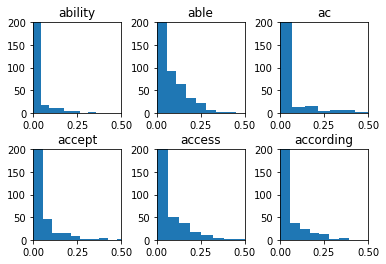

In [6]:
columns = ng_train.columns[:]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    column_i = columns[i]
    plt.hist(ng_train[column_i])
    plt.xlim(0,0.5)
    plt.ylim(0,200)
    plt.title(column_i)


 - For the attributes, data is almost always 0, meaning that each word analysed is used only in a small subsection of articles.

##### Testing Set

Nrows: 1883
NCols: 1001
[0 1 2 3 4 5 6 7]
Number of classes: 8


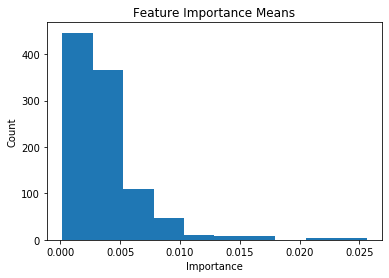

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449,3.345194
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570,2.208286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114,7.000000


In [7]:
print('Nrows: {}'.format(ng_test.shape[0]))
print('NCols: {}'.format(ng_test.shape[1]))
list_un = ng_test['class'].unique()
sort_un = np.sort(list_un)
print(sort_un)
print('Number of classes: {}'.format(len(ng_test['class'].unique())))

X_temp_2 = ng_test.drop('class', axis = 1)

description_2 = X_temp_2.describe()
means_importance_2 = (description_2[:'mean'].drop('count')).values

plt.hist(means_importance_2[0])
plt.title('Feature Importance Means')
plt.xlabel('Importance')
plt.ylabel('Count')
plt.show()
ng_test.describe()

 - We have 1883 data points/ articles with 1001 attributes
 - All attributes seem to have between a 0 minimum and 1 maximium, this suggest the data has already been standardised using max/min function
 - The standard deviations and means of the attributes are all low(<<1) however not equal across the board and so there has been no mu/sigma standardisation
 - There are 8 unique classes for the data

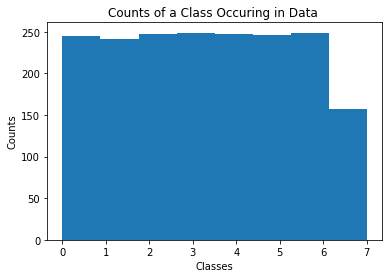

Number of 0 class occurences: 245
Number of 1 class occurences: 241
Number of 2 class occurences: 248
Number of 3 class occurences: 249
Number of 4 class occurences: 248
Number of 5 class occurences: 246
Number of 6 class occurences: 249
Number of 7 class occurences: 157


In [8]:
plt.hist(ng_test['class'], bins = 8)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Counts of a Class Occuring in Data ')
plt.show()

for i in sort_un:
    total_of_class = ng_test[ng_test['class']==i].shape[0]
    print('Number of {:.0f} class occurences: {}'.format(i, total_of_class))

 - Same phenomena as seen in the training data where class 8 is less frequently seen/ sampled from.

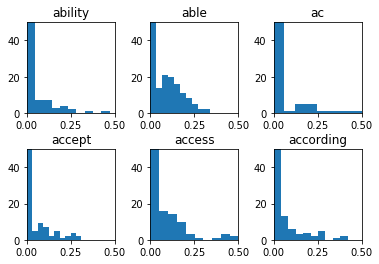

In [9]:
columns = ng_test.columns[:]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    column_i = columns[i]
    plt.hist(ng_test[column_i])
    plt.xlim(0,0.5)
    plt.ylim(0,50)
    plt.title(column_i)


- Attributes follow a very simlar distribution as in the trianing set where most articles do not contain them and a small proportio do, tending off.

The tf-idf feature engineering makes rare words more prominent and effectively ignores common words. This should allow the algorithms to more easily ralate certain words to a certain class. 

In [10]:
X_train = (ng_train.drop('class', axis = 1)).values
y_train = (ng_train['class']).values

X_test = (ng_test.drop('class', axis = 1)).values
y_test = (ng_test['class']).values

print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))
X = X_train
y = y_train

X_train: (5648, 1000)
y_train: (5648,)
X_test: (1883, 1000)
y_test: (1883,)


## 2.Unsupervised Learning

### 2.1 Centroids

K-means is a non deterministic algorithm. This means that running the algorithm multiple times on the same dataset, could give different results each time. This happens because the initial centroid placements are not fixed and so will converge at differetn locations within the data space. In scikit learn, KMeans picks a final model after the centroids movement from the last iteration falls below a 'significant' threshold.  In this implememtation the centroids are initialsed, generally, far way to try and combat local minima.

### 2.2 K Parameter

As there are 8 classes in this dataset, using 8 clusters (k=8) seems reasonable. It allows each class its own individual cluster.

### 2.3 Mutual information

Mutual Infomration is mathematically defined as: $$I(X ; Y)=\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} P(x, y) \log \frac{P(x, y)}{P(x) P(y)}$$ It can also be defined in terms of entropy like this $$I(X ; Y)=H(X)-H(X | Y)$$ where H(x) is the enrtopy of variable X and H(X|Y) is the conditional entropy between the two variables.<br> MI meaures the amount of information gained about one variable through observing another. <br> This is applicable here as we want to try and find similarities and connections between the data points as that is how we partition them into clusters.<br>This may be difficult to do in practice as conditional probabilities become exponentially expensive with number of variables.

### 2.4 Fitting for N Clusters

In [11]:
clusters = np.arange(2,13,1)
MI = []
for i in clusters:
    k_means = KMeans(n_clusters=i, random_state=1000, n_init = 50).fit(X_train)
    labels_pred = k_means.labels_
    mutual = adjusted_mutual_info_score(y_train, labels_pred, average_method='max')
    MI.append(mutual)

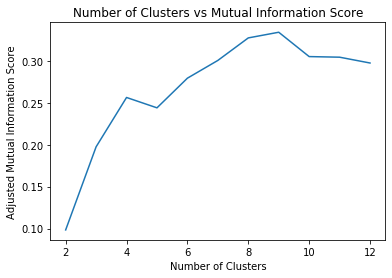

In [138]:
plt.plot(clusters, MI)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Mutual Information Score')
plt.title('Number of Clusters vs Mutual Information Score')
plt.show()

### 2.5 Mutual Info vs Cluster Count Analysis

The sharpest increase in MI score is from k = 2 to k = 4. After this there is a drop at k = 5 and then a gradual rise until k = 9 where the score then drops again and continues to do so. The peak at k = 4 is interesting however using the knowldge that our 8 classes can be considered as 4 when grouped by tpoic this becomes more reasonable. Since there are 8 classes we expect a peak in MI score at that value, however we instead find that peak at k = 9. This is outside expectations.
 - A local maximum at k = 4
 - A seemingly continuos decrease after k = 9
 - Actual peak at k = 9 intead of k = 8

### 2.6 Cluster(k=4)  Analysis 

In [13]:
#Retraining for k = 4
k_means4 = KMeans(n_clusters=4, random_state=1000, n_init = 50).fit(X_train)

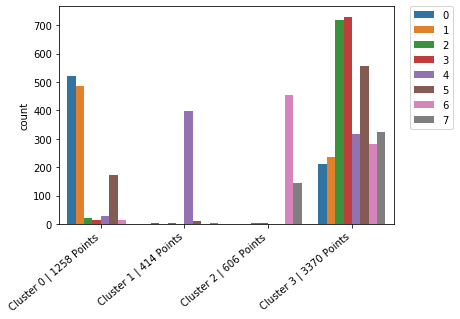

Score: 0.222


In [14]:
labels_pred4 = k_means4.labels_
centroids4 = k_means4.cluster_centers_
inertia = k_means4.inertia_

labels = []
for i in range(0,4):
    k = i
    total = 0
    for j in range(0,len(labels_pred4)):
        if labels_pred4[j] == i:
            total +=1
    new_label = 'Cluster {} | {} Points'.format(k,total)
    labels.append(new_label)
    
ax = sns.countplot(labels_pred4, hue = y_train)

ax.set_xticklabels(labels, fontsize=10,rotation=40, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print('Score: {:.3f}'.format(accuracy_score(y_train, labels_pred4)))

 - Obviously low classification score as we are only using 4 clusters
 - As there are 4 sub groups to the 8 classes, we expect to see 4 sets of 2 classes closely related
 - For the most part this seems to be shown, classes 0 and 1 are largely found together(mostly in cluster 0), classes 2 and 3 are found together in cluster 4, classes 4 and 5 are a bit more split between clusters than others however still have almost their own dedicated cluster at cluster 1, classes 6 and 7 also behave similarly with their main cluster being number 2.
 - Eaxh set of two classes we expect to be classified togethe rin a k=4 KMeans has its 'own' cluster to some extent, where the subset is somewhat seperated out from other classes. This is hatded to see in cluster 3 as it seems to contain much of the overflow of other labels, however its peak two classes are still two of those we expect to belong together. This conforms fairly well to observations made in 2.5.

## 3.Logistic Regression Classification

In [15]:
#K-fold stratification
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

### 3.1 F1 Score and Accuracy


The F1 score is defined as: $$2*((precision*recall)/(precision+recall))$$ and represnts the balance between precision and recall. It is the harmoic mean of preciison and recall. 
 - It is useful in this problem because we have several labels which can overlap a fair amount
 - The macro average can allow us calculate precision and recall metrics for each class label and find their unweighted mean. These metrics can then be used to calcualte F1 scores for each class and then by averaging this value, we can obtain a final F1 score across the full dataset. This method however does not take class imbalances into consideration

### 3.2 Baseline(Dummy) Classifier

A baseline classifier(dummy classifier) is one that always predicts the most frequent class that occurs in the training data set.

In [16]:
dummy = DummyClassifier(strategy = 'most_frequent', random_state = 0)
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

f1_score_dummy = f1_score(y_test, dummy_pred, average = 'macro')
print('F1 Score of Dummy on testing set: {:.3f}'.format(f1_score_dummy))

F1 Score of Dummy on testing set: 0.029


### 3.3 Logistic Regression Theory 

 - Logistic regression makes use of the softmax function to expand into the multi-class enviroment. For k different classes/labels the function has the form: $$\operatorname{softmax}(\boldsymbol{z})=\frac{e^{z}}{\sum_{i=1}^{k} e^{z_{i}}} $$
 - Given an input vector z, softmax does two things. First, it exponentiates (elementwise) $e^{z}$, forcing all values to be strictly positive. Then it normalizes so that all values sum to 1.
 - In our case for example, the softmax's output would be measured for all our 8 class labels, where each one is normalised by the sum of the exponentials of all class labels. This outputs 8 distinct probabilities which sum to 1, the highest probability of an individual class is chosen and the data poiunt is assigned that label.

### 3.4 Training Logistic Regressor

Mean: 0.6690
STD: 0.0169


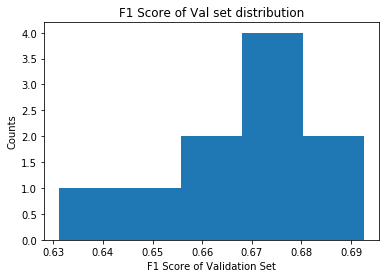

In [17]:
val_f1_scores = []
for train_index, val_index in folds.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    logR = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0)
    logR.fit(X_train, y_train)
    log_pred = logR.predict(X_val)

    f1_score_val = f1_score(y_val, log_pred, average = 'macro')
    val_f1_scores.append(f1_score_val)
        
print('Mean: {:.4f}'.format(np.mean(val_f1_scores)))
print('STD: {:.4f}'.format(np.std(val_f1_scores)))

plt.hist(val_f1_scores, bins = 5)
plt.xlabel('F1 Score of Validation Set')
plt.ylabel('Counts')
plt.title('F1 Score of Val set distribution')
plt.show()
        

 - Considering f1 score has a maximum of 1 and a minimum of 0, an average score across all of the validation sets of 0.67 is fairly good. The standard deviation is also fairly small. This is a significantly better score than the one found in the summy testing classifier.

### 3.5 Optimising C Parameter

In [18]:
c_values = np.logspace(-4, 5, 19)

f1_val_avg = []
f1_train_avg = []

for i in c_values:
    val_scores = []
    train_scores = []
    
    for train_index, val_index in folds.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        logR = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C = i, max_iter = 200)
        logR.fit(X_train, y_train)

        log_pred_train = logR.predict(X_train)
        f1_score_train = f1_score(y_train, log_pred_train, average = 'macro')

        log_pred_val = logR.predict(X_val)
        f1_score_val = f1_score(y_val, log_pred_val, average = 'macro')

        val_scores.append(f1_score_val)
        train_scores.append(f1_score_train)
    
    f1_val_avg.append(np.mean(val_scores))
    f1_train_avg.append(np.mean(train_scores))

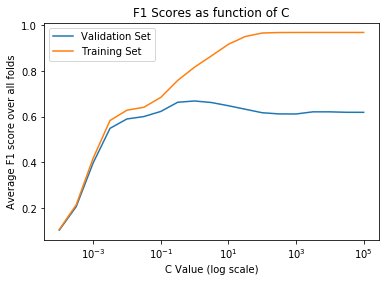

In [19]:
plt.plot(c_values, f1_val_avg)
plt.plot(c_values, f1_train_avg)
plt.xscale('log')
plt.legend(['Validation Set', 'Training Set'], loc='upper left')
plt.xlabel('C Value (log scale)')
plt.ylabel('Average F1 score over all folds')
plt.title('F1 Scores as function of C')
plt.show()

### 3.6 Optimal C Value 

 - The idea for picking the optimal value of C is to pick the value that gives the highest validation set score 
 - Might be smallest differnce but that would result in super low score ??

In [20]:
index_of_max = np.argmax(f1_val_avg)
c_opt = c_values[index_of_max]

print('Optimal Value of C: {}'.format(c_opt))
print('Corresponding Val Score: {:.3f}'.format(f1_val_avg[index_of_max]))
print('Corresponding Train Score: {:.3f}'.format(f1_train_avg[index_of_max]))

Optimal Value of C: 1.0
Corresponding Val Score: 0.669
Corresponding Train Score: 0.817


 - This value was found by findning the maximum index value for the validation f1 score.
 - C represents the inverse regularisation score, that is lower numbers correpsond to higher regularisation. 
 - Regulariation is in place to penalise more complex models, to prevent overfitting the data. 
 - At very low values of C, high regularisation, we see that the models that we allows the alogorithm to produce are too simple to capture relevent details within our data and we end up with low F1 scores. As we slowly alleviate this regularisation, the models complexity can grow and start to capture more details and connections within our data. If while we do this the scores for both out validation and training sets go up, we can justify that the training data is not yet becomeing overfit and we can continue to reduce regularisation. At a point our validation and trianing curves start to deviate as we become better at fitting the training data that the validation data. This marks the start of overfitting and if allowed to continue by reducing regularisation further, out training score becomes ever better, however the validation set score will stagnate/worsen and deviate further.
 - This optimal value of 1 is the default for the regressor 

### 3.7 Best Model

In [21]:
best_log = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C = c_opt, max_iter = 200)
best_log.fit(X, y)

y_pred = best_log.predict(X_test)
best_f1 = f1_score(y_test, y_pred, average = 'macro')

print('Best F1 Score: {:.3f}'.format(best_f1))

Best F1 Score: 0.675


## 4.Hierarchical Classification

In [22]:
#Data Loading 
data_path_hier = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_train_hierarchical.csv')
ng_hier = pd.read_csv(data_path_hier, delimiter = ',', header = 0, compression = 'bz2')

In [23]:
print('Nrows: {}'.format(ng_hier.shape[0]))
print('NCols: {}'.format(ng_hier.shape[1]))

X_hier = (ng_hier.drop(['class', 'super'], axis = 1)).values
y_hier = (ng_hier['super']).values

print('X_hier: {}'.format(X_hier.shape))
print('y_hier: {}'.format(y_hier.shape))

Nrows: 5648
NCols: 1002
X_hier: (5648, 1000)
y_hier: (5648,)


### 4.1 Feature Selection

 - Hierarchical classifiction may benefit from more topic related words, where a topic is one of the 4 super groups.
 - Words that maybe relate to the full topic as opposed to individual article types
 - words such as belief, bible, algorithm, computers,bit, car, bike/bikes, christians, church
 - All of thse words can fairly easily be catagorised into one of the 4 super groups

### 4.2 Hierarchical Logistic Training 

In [24]:
folds_hier = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

c_values = np.logspace(-4, 5, 19)
f1_val_avg_h = []
f1_train_avg_h = []

for i in c_values:
    val_scores = []
    train_scores = []
    
    for train_index, val_index in folds.split(X_hier, y_hier):
        X_train, X_val = X_hier[train_index], X_hier[val_index]
        y_train, y_val = y_hier[train_index], y_hier[val_index]

        logR = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C = i, max_iter = 200)
        logR.fit(X_train, y_train)

        log_pred_train = logR.predict(X_train)
        f1_score_train = f1_score(y_train, log_pred_train, average = 'macro')

        log_pred_val = logR.predict(X_val)
        f1_score_val = f1_score(y_val, log_pred_val, average = 'macro')

        val_scores.append(f1_score_val)
        train_scores.append(f1_score_train)
    
    f1_val_avg_h.append(np.mean(val_scores))
    f1_train_avg_h.append(np.mean(train_scores))


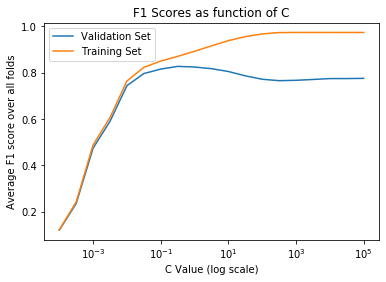

In [25]:
plt.plot(c_values, f1_val_avg_h)
plt.plot(c_values, f1_train_avg_h)
plt.xscale('log')
plt.legend(['Validation Set', 'Training Set'], loc='upper left')
plt.xlabel('C Value (log scale)')
plt.ylabel('Average F1 score over all folds')
plt.title('F1 Scores as function of C')
plt.show()

In [26]:
index_of_max_h = np.argmax(f1_val_avg_h)
c_opt_h = c_values[index_of_max_h]

print('Optimal Value of C: {:.3f}'.format(c_opt_h))
print('Corresponding Val Score: {:.3f}'.format(f1_val_avg_h[index_of_max_h]))
print('Corresponding Train Score: {:.3f}'.format(f1_train_avg_h[index_of_max_h]))

Optimal Value of C: 0.316
Corresponding Val Score: 0.827
Corresponding Train Score: 0.870


In [27]:
best_h = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C = c_opt_h, max_iter = 200)
best_h.fit(X_hier, y_hier)

y_pred_h = best_h.predict(X_hier)
best_f1_h = f1_score(y_hier, y_pred_h, average = 'macro')

print('Best F1 Score: {:.3f}'.format(best_f1_h))


Best F1 Score: 0.869


 - Yes we can compare the F1 score and can say that the prediction of super labels seems to be better than prediction over the full set of 8 labels.

### 4.3 Binary Classifiers Theory

 - We should use the true super class labels and not the ones predicted above as some have been incorrectly classified and so when going to binary classification on all 4 classes, we would be trying to predict one of two classes for a dat point that maybe shiuldnt be there at all, which makes it an outlier.

### 4.4 Binary Classifiers

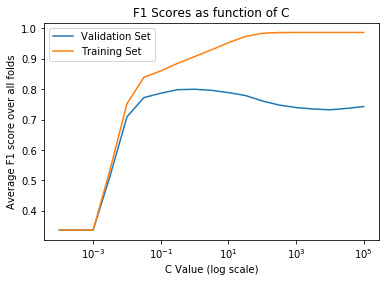

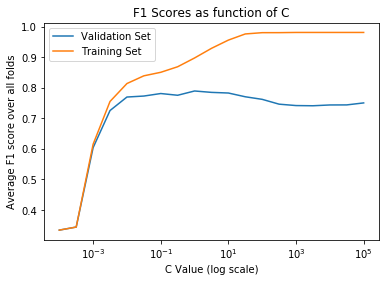

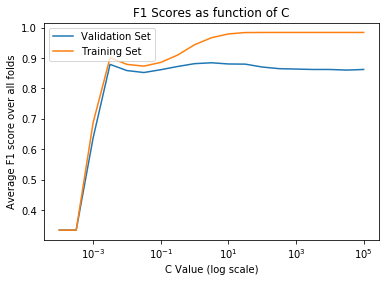

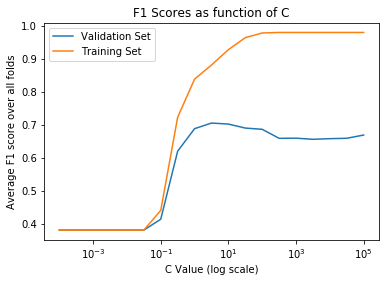

In [114]:
new_folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
super_groups = [0,1,2,3]
best_binaries = []

c_optimals = []
f1_optimals = []

for i in super_groups:
    #New data Management
    new_data_frame = ng_hier[ng_hier['super'] == i]
    X_aye = (new_data_frame.drop(['class','super'], axis = 1)).values
    y_aye = (new_data_frame['class']).values
    
    f1_val_avg_h = []
    f1_train_avg_h = []

    for i in c_values:
        val_scores = []
        train_scores = []

        for train_index, val_index in new_folds.split(X_aye, y_aye):
            X_train, X_val = X_aye[train_index], X_aye[val_index]
            y_train, y_val = y_aye[train_index], y_aye[val_index]

            logR = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=0, C = i, max_iter = 200)
            logR.fit(X_train, y_train)

            log_pred_train = logR.predict(X_train)
            f1_score_train = f1_score(y_train, log_pred_train, average = 'macro')

            log_pred_val = logR.predict(X_val)
            f1_score_val = f1_score(y_val, log_pred_val, average = 'macro')

            val_scores.append(f1_score_val)
            train_scores.append(f1_score_train)

        f1_val_avg_h.append(np.mean(val_scores))
        f1_train_avg_h.append(np.mean(train_scores))

    plt.plot(c_values, f1_val_avg_h)
    plt.plot(c_values, f1_train_avg_h)
    plt.xscale('log')
    plt.legend(['Validation Set', 'Training Set'], loc='upper left')
    plt.xlabel('C Value (log scale)')
    plt.ylabel('Average F1 score over all folds')
    plt.title('F1 Scores as function of C')
    plt.show()
    
    index = np.argmax(f1_val_avg_h)
    c_opt_h = c_values[index]
    best_f1_new = f1_val_avg_h[index]
    
    c_optimals.append(c_opt_h)
    f1_optimals.append(best_f1_new)
    
    best_for_group = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=0, C = c_opt_h, max_iter = 200)
    best_for_group.fit(X_aye, y_aye)
    
    best_binaries.append(best_for_group)
    
    

In [143]:
df_dict = {'Optimal C Parameters':c_optimals, 'Associated F1 Scores':f1_optimals, 'Super Group': super_groups}

optimal_df = pd.DataFrame(df_dict, columns = ['Super Group', 'Optimal C Parameters','Associated F1 Scores' ])
#optimal_df = optimal_df.set_index('Super Group')
optimal_df = optimal_df.round(4)
print(optimal_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Super Group &  Optimal C Parameters &  Associated F1 Scores \\
\midrule
0 &            0 &                1.0000 &                0.7998 \\
1 &            1 &                1.0000 &                0.7891 \\
2 &            2 &                3.1623 &                0.8842 \\
3 &            3 &                3.1623 &                0.7050 \\
\bottomrule
\end{tabular}



### 4.6 Hierarchical Classification

 - We are using test data for predictions
 - Want to train the group level classifier
 - Make predictions on this level
 - Put classes back with data
 - filter data based on these preidctions and indicies
 - Pass to individual pre-trained binary classifiers which are the best trianed on all data available to each of them
 - compare final f1 score(average) to the one with one layer  

In [116]:
#Group level and prdictions
print(best_h)
print(best_binaries)
columns = test_data.columns

test_data = ng_test

test_X = (test_data.drop('class', axis = 1)).values
test_y = (test_data['class']).values

pred_super = best_h.predict(test_X)


LogisticRegression(C=0.31622776601683794, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), LogisticRegression(C=3.1622776601683795, clas

In [117]:
#Recombining data 

group_0 = []
group_1 = []
group_2 = []
group_3 = []

index_0 = []
index_1 = []
index_2 = []
index_3 = []

for i in range(0, len(pred_super)):
    if pred_super[i] ==0:
        group_0.append(test_X[i])
        index_0.append(i)
        
    if pred_super[i] ==1:
        group_1.append(test_X[i])
        index_1.append(i)
        
    if pred_super[i] ==2:
        group_2.append(test_X[i])
        index_2.append(i)
        
    if pred_super[i] ==3:
        group_3.append(test_X[i])
        index_3.append(i)
        
group_0 = np.array(group_0)
group_1 = np.array(group_1)
group_2 = np.array(group_2)
group_3 = np.array(group_3)


full_data = [group_0, group_1, group_2, group_3]
full_index = [index_0, index_1, index_2, index_3]

In [136]:
#Filter Data 
#true_0 = test_y[full_index[0]]
f1_scores = []
for i in range(0,4):
    object_to_use = best_binaries[i]
    data = full_data[i]
    index = full_index[i]
    
    predictions = object_to_use.predict(data)
    y_true = test_y[index]
    score = f1_score(y_true, predictions, average = 'macro')
    print(classification_report(y_true, predictions))
    f1_scores.append(score)
list_as_given = [0.78,0.77,0.68,0.73,0.88,0.75,0.79,0.55]
print(len(list_as_given))
print(np.mean(list_as_given))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       218
           1       0.70      0.86      0.77       187
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.72       471
   macro avg       0.18      0.21      0.19       471
weighted avg       0.62      0.72      0.67       471

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        23
           2       0.57      0.85      0.68       217
           3       0.69      0.79      0.73       219
           4       0.00      0.00      0.00        26
           5       0.00 

In [122]:
print(np.mean(f1_scores))

0.1915491065338925
